# PCA Data Analysis
- **Created by Andrés Segura Tinoco**
- **Created on Apr 27, 2020**
- **Data: Covid 19**

## 1. Read C19 data by country

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Reading data from CSV file
dataURL = "../data/country_info.csv"
countries = pd.read_csv(dataURL)

dataURL = "../data/current_data.csv"
raw_data = pd.read_csv(dataURL, usecols = lambda column : column not in ["row_index", "date", "datestamp"])

In [4]:
# Show first 10 rows of header dataframe
countries.head(10)

,country,full_name,url,capital,region,sub_region,area,population,lat,long,flag
0,Afghanistan,Afghanistan,country/afghanistan/,Kabul,Asia,Southern Asia,652230.0,27657145,33.00,65.000000,https://restcountries.eu/data/afg.svg
1,Albania,Albania,country/albania/,Tirana,Europe,Southern Europe,28748.0,2886026,41.00,20.000000,https://restcountries.eu/data/alb.svg
2,Algeria,Algeria,country/algeria/,Algiers,Africa,Northern Africa,2381741.0,40400000,28.00,3.000000,https://restcountries.eu/data/dza.svg
3,Andorra,Andorra,country/andorra/,Andorra la Vella,Europe,Southern Europe,468.0,78014,42.50,1.500000,https://restcountries.eu/data/and.svg
4,Angola,Angola,country/angola/,Luanda,Africa,Middle Africa,1246700.0,25868000,-12.50,18.500000,https://restcountries.eu/data/ago.svg
5,Anguilla,Anguilla,country/anguilla/,The Valley,Americas,Caribbean,91.0,13452,18.25,-63.166667,https://restcountries.eu/data/aia.svg
6,Antigua and Barbuda,Antigua and Barbuda,country/antigua-and-barbuda/,Saint John's,Americas,Caribbean,442.0,86295,17.05,-61.800000,https://restcountries.eu/data/atg.svg
7,Argentina,Argentina,country/argentina/,Buenos Aires,Americas,South America,2780400.0,43590400,-34.00,-64.000000,https://restcountries.eu/data/arg.svg
8,Armenia,Armenia,country/armenia/,Yerevan,Asia,Western Asia,29743.0,2994400,40.00,45.000000,https://restcountries.eu/data/arm.svg
9,Aruba,Aruba,country/aruba/,Oranjestad,Americas,Caribbean,180.0,107394,12.50,-69.966667,https://restcountries.eu/data/abw.svg


In [5]:
# Show first 10 rows of header dataframe
region = "Europe"
america_list = list(countries[countries["region"] == region]["country"])
len(america_list)

49

In [6]:
raw_data = raw_data[raw_data["country"].isin(america_list)]
raw_data = raw_data.reset_index(drop=True)
raw_data.head(10)

,country,total_cases,total_deaths,total_recovered,active_cases,serious_critical,tot_cases_1m_pop,deaths_1m_pop,total_tests,tests_1m_pop
0,UK,248818,35341,-1,-1,1559,3665.23,520.59,2772552,40841.29
1,Italy,226699,32169,129401,65129,716,3758.45,533.33,3104524,51470.03
2,France,180809,28022,62563,90224,1894,2695.58,417.76,1384633,20642.75
3,Spain,278803,27778,196958,54067,1152,5931.05,590.93,3037840,64624.76
4,Belgium,55983,9150,14847,31986,313,4861.41,794.56,720228,62542.65
5,Germany,178170,8213,156900,13057,1115,2142.77,98.77,3147771,37856.86
6,Netherlands,44447,5748,-1,-1,275,2550.76,329.87,302395,17354.11
7,Sweden,31523,3831,4971,22721,352,3185.79,387.17,209900,21212.97
8,Russia,308705,2972,85392,220341,2300,2105.78,20.27,7578029,51692.16
9,Switzerland,30658,1892,27800,966,55,3675.31,226.81,355393,42604.90


In [7]:
# Create numerical dataset
dataset = raw_data.drop(columns=["country"])
col_list = dataset.columns

## 2. Data Quality process with Standardization

In [8]:
# Filter data
min_deaths = 200
x = dataset.loc[dataset['total_deaths'] >= min_deaths]
len(x)

23

In [9]:
# Standardize the Data
x = StandardScaler().fit_transform(x)

# Show skills data in temporary dataframe
norm_data = pd.DataFrame(data = x, columns = col_list)
norm_data.head()

,total_cases,total_deaths,total_recovered,active_cases,serious_critical,tot_cases_1m_pop,deaths_1m_pop,total_tests,tests_1m_pop
0,1.737573,2.515489,-0.621795,-0.527578,1.668414,0.918647,1.405067,0.940101,0.191647
1,1.514127,2.232832,1.769147,0.842047,0.371814,0.984110,1.462670,1.134464,0.723236
2,1.050547,1.863293,0.534191,1.369773,2.183670,0.237720,0.940128,0.127500,-0.818569
3,2.040481,1.841550,3.017389,0.609423,1.042416,2.509796,1.723104,1.095422,1.381161
4,-0.210444,0.181610,-0.347451,0.145080,-0.248032,1.758652,2.643803,-0.261496,1.277025


## 3. Correlation matrix between Countries

In [10]:
# Calculate skills correlations
corr = norm_data.corr()
corr

,total_cases,total_deaths,total_recovered,active_cases,serious_critical,tot_cases_1m_pop,deaths_1m_pop,total_tests,tests_1m_pop
total_cases,1.000000,0.775473,0.761974,0.703869,0.909220,0.521942,0.471953,0.892987,0.304838
total_deaths,0.775473,1.000000,0.552243,0.263085,0.645779,0.606233,0.737789,0.434798,0.199856
total_recovered,0.761974,0.552243,1.000000,0.461097,0.566717,0.498881,0.347580,0.649685,0.333134
active_cases,0.703869,0.263085,0.461097,1.000000,0.780502,0.191538,0.119297,0.851292,0.205639
serious_critical,0.909220,0.645779,0.566717,0.780502,1.000000,0.325828,0.329762,0.847935,0.105831
tot_cases_1m_pop,0.521942,0.606233,0.498881,0.191538,0.325828,1.000000,0.857573,0.286101,0.569459
deaths_1m_pop,0.471953,0.737789,0.347580,0.119297,0.329762,0.857573,1.000000,0.167315,0.334599
total_tests,0.892987,0.434798,0.649685,0.851292,0.847935,0.286101,0.167315,1.000000,0.325031
tests_1m_pop,0.304838,0.199856,0.333134,0.205639,0.105831,0.569459,0.334599,0.325031,1.000000


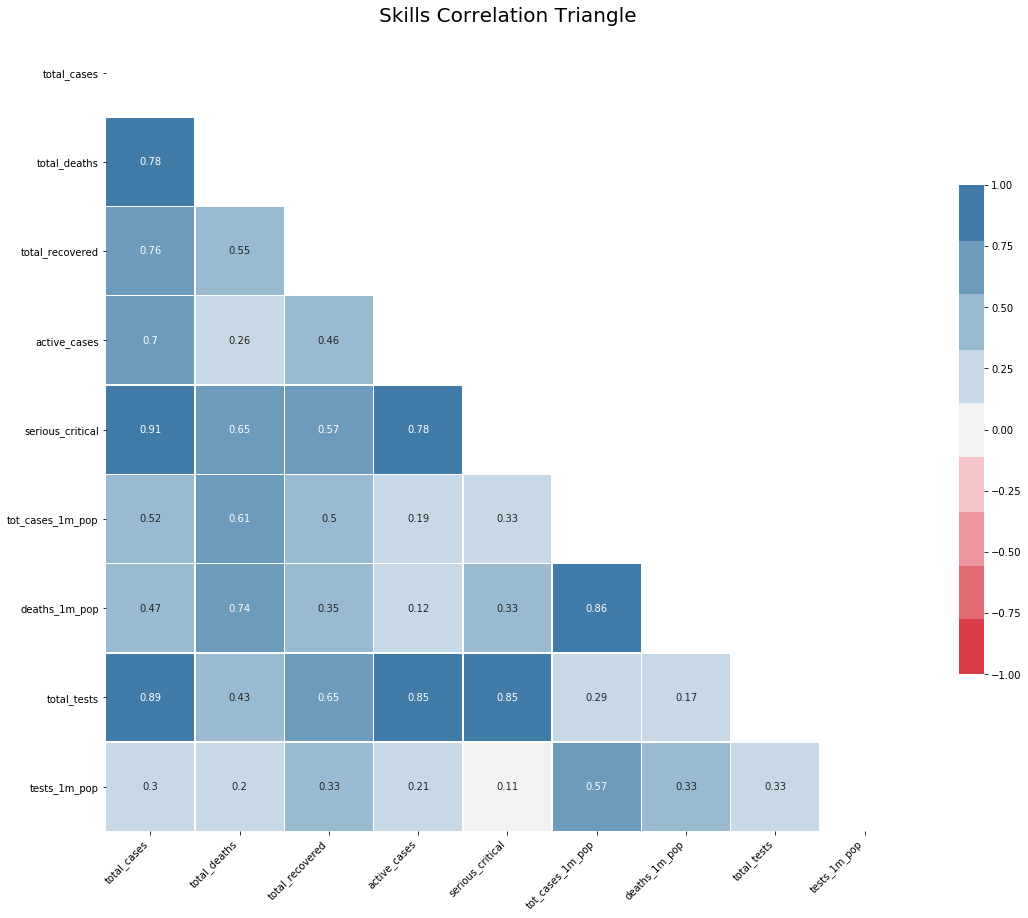

In [11]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax1 = plt.subplots(figsize = (18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 240, n = 9)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = cmap, vmin = -1, vmax = 1, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5}, annot=True)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, horizontalalignment = 'right');

# Add title
ax1.set_title("Skills Correlation Triangle", fontsize = 20)
plt.show()

## 4. PCA Process

In [12]:
# Principal Component Analysis
pca = PCA(n_components = 5)
pca_data = pca.fit_transform(x)
len(pca_data)

23

In [13]:
# Create and show principal components DataFrame
df_pca = pd.DataFrame(data = pca_data, columns = ["PC1", "PC2", "PC3", "PC4", "PC5"])
df_pca = pd.concat([df_pca, raw_data["country"]], axis = 1)
df_pca = df_pca[df_pca["PC1"].notnull()]
df_pca.head(10)

,PC1,PC2,PC3,PC4,PC5,country
0,2.907924,-1.035491,-1.663493,-0.816216,1.717263,UK
1,3.682619,-0.889103,-0.346810,0.700947,0.190650,Italy
2,2.748517,0.531558,-1.914777,-0.587182,0.099322,France
3,5.022967,-1.688782,0.331148,1.395177,-0.536181,Spain
4,1.195583,-2.735283,0.560127,-1.368785,-0.699331,Belgium
5,1.808329,1.035831,0.132669,1.984026,-0.035393,Germany
6,-0.866999,-0.568588,-0.963822,-0.368606,-0.404271,Netherlands
7,-0.535477,-0.738908,-0.676483,-0.685068,-0.867996,Sweden
8,4.801866,4.431874,1.507297,-1.222070,-0.386291,Russia
9,-0.625519,-1.062731,0.522606,0.038648,-0.484861,Switzerland


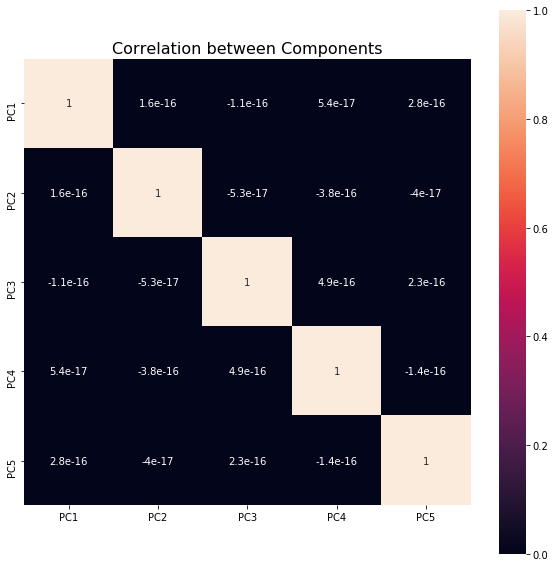

In [14]:
# Show correlation between components
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(df_pca.corr(), square=True, annot=True)
ax.set_title("Correlation between Components", fontsize = 16)
plt.show()

## 5. PCA Variance Ratio

In [15]:
# The explained variance tells us how much information (variance) can be attributed to each of the principal components
list(pca.explained_variance_ratio_)

[0.5710495128414844,
 0.2020479828345597,
 0.10727611135540499,
 0.05698680042787083,
 0.034409209516161526]

In [16]:
# Create horizontal bar chart data
bars = ("PC1", "PC2", "PC3", "PC4", "PC5")
y_pos = np.arange(len(bars))
values = pca.explained_variance_ratio_ * 100
cum = np.cumsum(values)

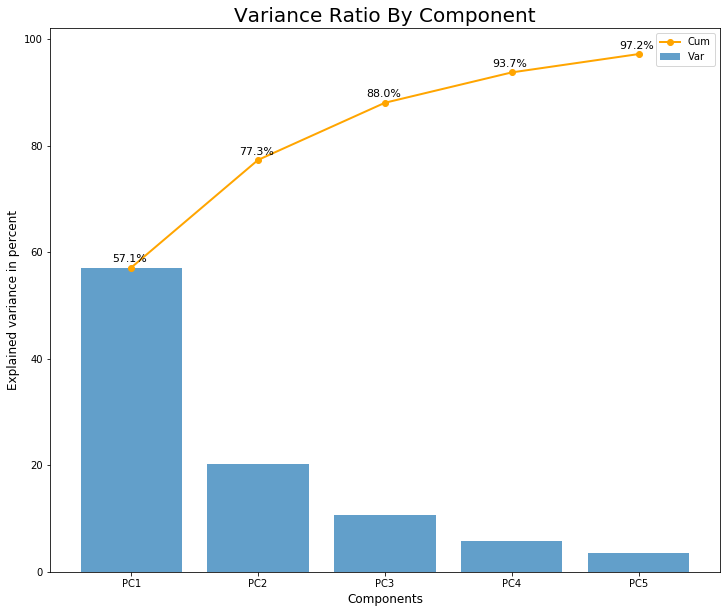

In [17]:
fig, ax2 = plt.subplots(figsize = (12, 10))

plt.bar(y_pos, values, align = "center", alpha = 0.7)
plt.xticks(y_pos, bars)
plt.plot(y_pos, cum, color = "orange", linewidth = 2, marker="o")
plt.title("Variance Ratio By Component", fontsize = 20)

# Add bar labels
for i, v in enumerate(cum):
    ax2.text(i - .15, v + 1, (str(round(v, 1))+"%"), color = "black", fontweight = "normal", fontsize = 11)

# Plot setup
plt.xlabel("Components", fontsize = 12)
plt.ylabel("Explained variance in percent", fontsize = 12)
plt.legend(("Cum", "Var"), loc = "best")
plt.show()

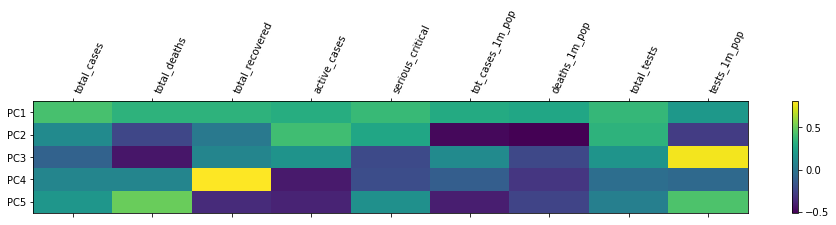

In [18]:
# Create a matshow plot of the Principal Components dependencies
fig = plt.figure(figsize = (16, 2))
plt.matshow(pca.components_, cmap = "viridis", fignum = fig.number, aspect = "auto")
plt.yticks([0, 1, 2, 3, 4], ["PC1", "PC2", "PC3", "PC4", "PC5"], fontsize = 10)
plt.colorbar()
plt.xticks(range(len(col_list)), col_list, rotation = 65, ha = "left")
plt.show()

## 6. PCA Plane Visualization

### 6.1. 2D Chart - The first 2 components

In [19]:
# Show the total explained variance ratio of model: Only 2 components
n_components = 2
sum(pca.explained_variance_ratio_[0:n_components]) * 100

77.30974956760441

In [20]:
n_vectors = 2
lengths = pca.explained_variance_[0:n_vectors]
vectors = pca.components_[0:n_components, 0:n_vectors]
means = pca.mean_[0:n_vectors]

In [21]:
# Function to draw vectors on plane
def draw_vector(v0, v1, ax = None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle = "->", linewidth = 2, shrinkA = 0, shrinkB = 0, color = "#ff7f0e")
    ax.annotate("", v1, v0, arrowprops = arrowprops)

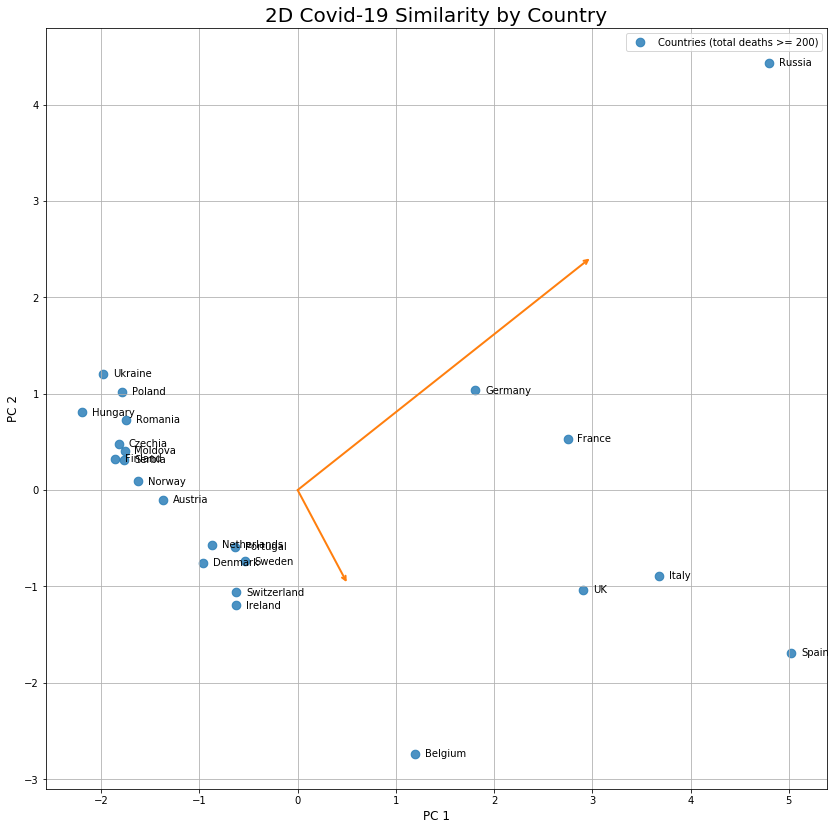

In [22]:
fig, ax3 = plt.subplots(figsize = (14, 14))

# Create 2D scatter plot
plot = sns.regplot(ax = ax3, data = df_pca, x = "PC1", y = "PC2", fit_reg = False
                   , marker = "o", color = "#1f77b4", scatter_kws = {"s": 75})

# Add annotations one by one with a loop
for ix in range(0, df_pca.shape[0]):
    plot.text(df_pca.PC1[ix] + 0.1, df_pca.PC2[ix] - 0.03, df_pca.country[ix], 
              horizontalalignment = "left", size = "medium", color = "black", weight = "normal")

# Drawing the eigen-vectors
for length, vector in zip(lengths, vectors):
    v = vector * 3 * np.sqrt(length)
    draw_vector(means, means + v)

# Plot setup
ax3.set_xlabel("PC 1", fontsize = 12)
ax3.set_ylabel("PC 2", fontsize = 12)
ax3.set_title("2D Covid-19 Similarity by Country", fontsize = 20)
ax3.legend(["Countries (total deaths >= " + str(min_deaths) + ")"])
ax3.grid()

### 6.2. 3D Chart - The first 3 components

In [23]:
# Show the total explained variance ratio of model: Only 3 components
sum(pca.explained_variance_ratio_[0:3]) * 100

88.03736070314491

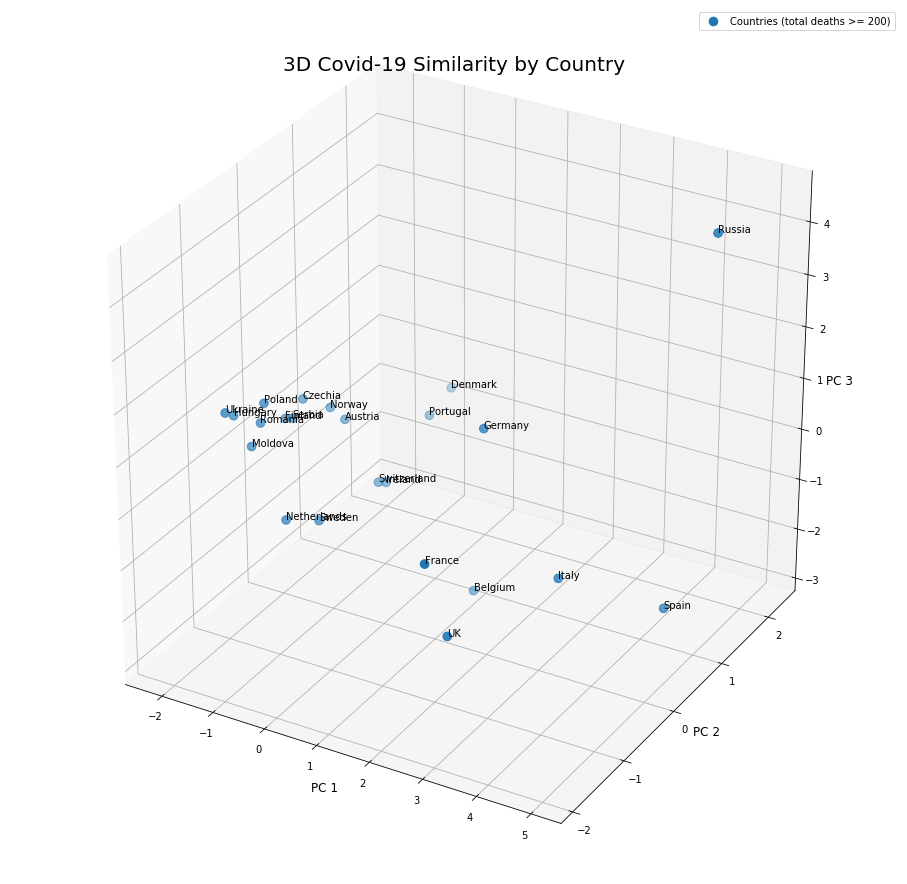

In [24]:
# Create 3D scatter plot
fig = plt.figure(figsize = (16, 16))
ax4 = fig.add_subplot(111, projection = "3d")

# Get (x, y, z) axis values
xx = df_pca.loc[:,["PC1"]].values
zz = df_pca.loc[:,["PC2"]].values
yy = df_pca.loc[:,["PC3"]].values

# Plot values
ax4.scatter(xx, yy, zz, c = "#1f77b4", marker = "o", s = 75)

# Add annotations one by one with a loop
for ix in range(0, len(x)):
    ax4.text(float(xx[ix]), float(yy[ix]), float(zz[ix]), df_pca.country[ix], 
             horizontalalignment = "left", size = "medium", color = "black", weight = "normal")

# Plot setup
ax4.set_xlabel("PC 1", fontsize = 12)
ax4.set_ylabel("PC 2", fontsize = 12)
ax4.set_zlabel("PC 3", fontsize = 12)
ax4.set_title("3D Covid-19 Similarity by Country", fontsize = 20)
ax4.legend(["Countries (total deaths >= " + str(min_deaths) + ")"])
ax4.grid()

## 7. Analysis of Similarity

### 7.1. Transpose the matrix by Countries

In [25]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,country
0,2.907924,-1.035491,-1.663493,-0.816216,1.717263,UK
1,3.682619,-0.889103,-0.346810,0.700947,0.190650,Italy
2,2.748517,0.531558,-1.914777,-0.587182,0.099322,France
3,5.022967,-1.688782,0.331148,1.395177,-0.536181,Spain
4,1.195583,-2.735283,0.560127,-1.368785,-0.699331,Belgium


In [26]:
# Transpose the matrix
df_temp = df_pca.copy()
df_trans = df_temp.drop(['country'], axis = 1).T
df_trans.columns = list(df_temp['country'])
df_trans.head()

,UK,Italy,France,Spain,Belgium,Germany,Netherlands,Sweden,Russia,Switzerland,...,Poland,Austria,Ukraine,Denmark,Hungary,Czechia,Finland,Serbia,Norway,Moldova
PC1,2.907924,3.682619,2.748517,5.022967,1.195583,1.808329,-0.866999,-0.535477,4.801866,-0.625519,...,-1.784445,-1.372410,-1.983308,-0.959224,-2.195022,-1.817463,-1.858254,-1.765518,-1.622448,-1.761627
PC2,-1.035491,-0.889103,0.531558,-1.688782,-2.735283,1.035831,-0.568588,-0.738908,4.431874,-1.062731,...,1.017864,-0.103798,1.203234,-0.757192,0.806506,0.476387,0.324248,0.311427,0.091199,0.403861
PC3,-1.663493,-0.346810,-1.914777,0.331148,0.560127,0.132669,-0.963822,-0.676483,1.507297,0.522606,...,-0.475703,0.616056,-0.983908,2.283613,-0.649095,0.259653,-0.028626,0.020015,0.581093,-0.734993
PC4,-0.816216,0.700947,-0.587182,1.395177,-1.368785,1.984026,-0.368606,-0.685068,-1.222070,0.038648,...,0.213934,0.186330,0.196303,-0.060131,0.214099,0.196669,0.158652,0.128190,-0.033961,0.020347
PC5,1.717263,0.190650,0.099322,-0.536181,-0.699331,-0.035393,-0.404271,-0.867996,-0.386291,-0.484861,...,0.085435,0.203029,-0.161818,1.118324,0.046847,0.376308,0.099129,-0.021776,0.278044,-0.434287


### 7.2. Calculate Pearson correlation matrix

In [27]:
# Calculate the correlation matrix
corr = df_trans.corr(method = 'pearson')
corr.iloc[:10, :10]

,UK,Italy,France,Spain,Belgium,Germany,Netherlands,Sweden,Russia,Switzerland
UK,1.000000,0.793307,0.818482,0.627314,0.483587,0.162181,-0.008543,0.189305,0.238926,-0.430496
Italy,0.793307,1.000000,0.763515,0.967339,0.680218,0.570958,-0.296140,0.715293,0.316720,-0.120452
France,0.818482,0.763515,1.000000,0.604235,0.190107,0.509210,-0.057867,0.440635,0.627456,-0.730758
Spain,0.627314,0.967339,0.604235,1.000000,0.751770,0.599201,-0.412456,0.823803,0.262605,0.094848
Belgium,0.483587,0.680218,0.190107,0.751770,1.000000,-0.049334,-0.694392,0.549044,0.115581,0.457859
Germany,0.162181,0.570958,0.509210,0.599201,-0.049334,1.000000,0.123249,0.672976,0.203468,-0.210783
Netherlands,-0.008543,-0.296140,-0.057867,-0.412456,-0.694392,0.123249,1.000000,-0.643776,-0.588302,-0.298855
Sweden,0.189305,0.715293,0.440635,0.823803,0.549044,0.672976,-0.643776,1.000000,0.538434,0.106774
Russia,0.238926,0.316720,0.627456,0.262605,0.115581,0.203468,-0.588302,0.538434,1.000000,-0.571276
Switzerland,-0.430496,-0.120452,-0.730758,0.094848,0.457859,-0.210783,-0.298855,0.106774,-0.571276,1.000000


### 7.3. Plot the correlation triangle

In [28]:
# Create Players Correlation Triangle plot
def plotCorrTriangle(corr):
    
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype = np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize = (16, 16))
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(10, 240, n=9)
    
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask = mask, cmap = cmap, vmin = -1, vmax = 1, center = 0,
                square = True, linewidths = .5, cbar_kws = {"shrink": .5})

    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right');

    # Add title
    ax.set_title("Correlation Triangle between Countries", fontsize = 20)

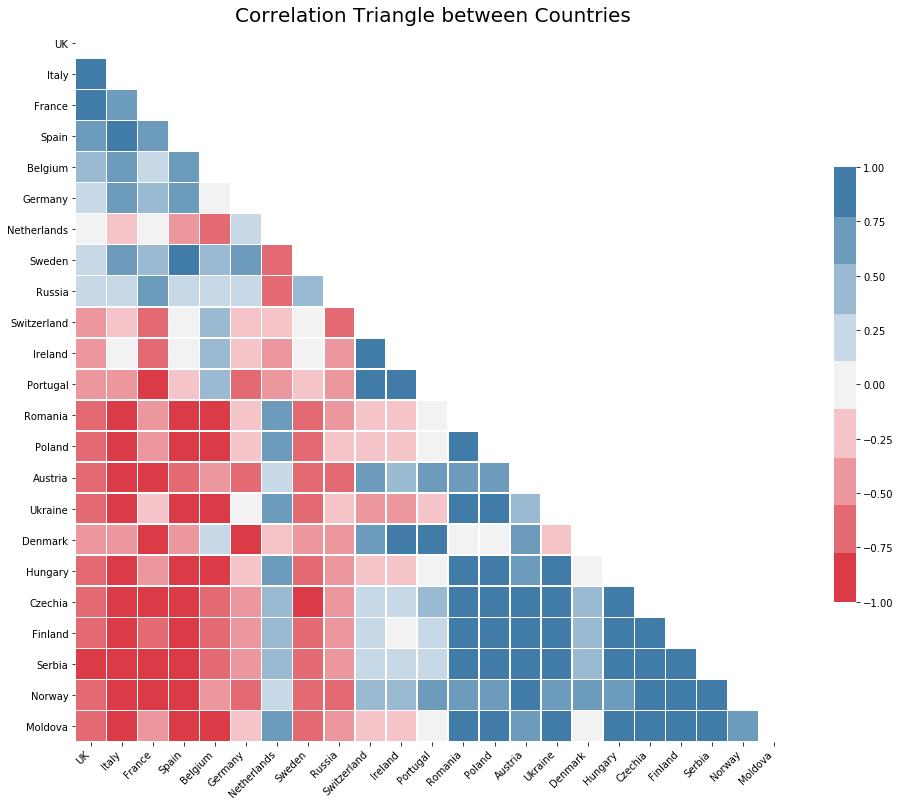

In [29]:
# Plot Correlation Triangle
plotCorrTriangle(corr)

<hr>
<p><a href="https://github.com/ansegura7/WebScraping_Covid19">« Home</a></p>